# Car Ad : Analisis Data Eksploratif & Visualisasi Data

Ini adalah sebuah set data tentang stock mobil yang akan dijual. Dataset ini memberi informasi tentang spesifikasi mobil.

File ini berisi informasi dasar tentang:
1. car
2. price
3. body
4. mileage
5. engV
6. engType
7. registration
8. year
9. model
10. drive

## Informasi Data:
Data ini dibuat hanya untuk tujuan pembelajaran konsep menentukan mobil yang akan dibeli berdasarkan spesifikasi yang di inginkan. Saya akan menunjukkan ini dengan menggunakan teknik Unsupervised Machine Learning dengan metode (KMeans Clustering Algorithm) dalam bentuk paling sederhana.

Sumber data : https://www.kaggle.com/rohitnegi548/eda-carsale-dataset

## Konten Analisa

Diibaratkan kita memiliki sebuah showroom penjualan mobil bekas dengan berbagai macam jenis kendaraan, kita memiliki beberapa spesifikasi data mobil yang ingin dijual seperti jenis mobil, type mobil, tahun pembuatan, kapasitas mesin, penggerka mobil, bahan bakar, dan jarak tempuh.
harga adalah sesuatu yang kita tetapkan untuk pelanggan berdasarkan parameter yang kita tentukan seperti jarak tempuh, kapasitas mesin dan tahun.

## Tujuan

Pada akhir studi kasus ini, kita akan dapat menjawab pertanyaan seperti :
1. Menentukan nilai harga dari sebuah mobil
2. menentukan prediksi harga mobil berdasarkan fitur yang ada di dalam dataset
3. Cara mencapai segmentasi harga menggunakan algoritma machine learning (KMeans Clustering) dengan Python dengan cara paling sederhana.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car_df = pd.read_csv('car_ad.csv' , encoding ='iso-8859-9')

In [3]:
car_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [4]:
car_df.shape

(9576, 10)

In [5]:
car_df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [6]:
car_df.dropna(how="any", inplace=True)
car_df.shape

(8739, 10)

In [7]:
car_df = car_df.drop(car_df[car_df.price == 0].index) 
car_df.shape

(8495, 10)

In [8]:
car_df.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [9]:
car_df.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [10]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8495 entries, 0 to 9575
Data columns (total 10 columns):
car             8495 non-null object
price           8495 non-null float64
body            8495 non-null object
mileage         8495 non-null int64
engV            8495 non-null float64
engType         8495 non-null object
registration    8495 non-null object
year            8495 non-null int64
model           8495 non-null object
drive           8495 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 730.0+ KB


In [11]:
car_df.describe() # Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom.

,price,mileage,engV,year
count,8495.000000,8495.000000,8495.000000,8495.000000
mean,16185.453305,141.744202,2.568337,2006.500883
std,24449.641512,97.464062,5.387238,6.925907
min,259.350000,0.000000,0.100000,1959.000000
25%,5490.000000,74.000000,1.600000,2004.000000
50%,9500.000000,130.000000,2.000000,2008.000000
75%,17145.600000,197.000000,2.500000,2011.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [12]:
car_df.corr()

,price,mileage,engV,year
price,1.000000,-0.336940,0.066226,0.393562
mileage,-0.336940,1.000000,0.042081,-0.503135
engV,0.066226,0.042081,1.000000,-0.041076
year,0.393562,-0.503135,-0.041076,1.000000


- yang memiliki korelasi positif terhadap harga adalah "year" dan "drive"
- yang memiliki korelasi negatif terhadap harga adalah "mileage" dan "body" 
- 4 fitur tersebut merupakan fitur penting yang bisa menentukan harga jual mobil

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.style.use('ggplot')

%matplotlib inline

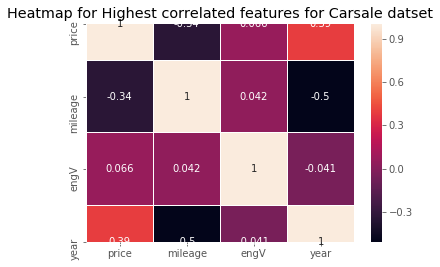

In [14]:
sns.heatmap(car_df.corr(),annot=True, linewidths=.2)
plt.title("Heatmap for Highest correlated features for Carsale datset")
plt.show()

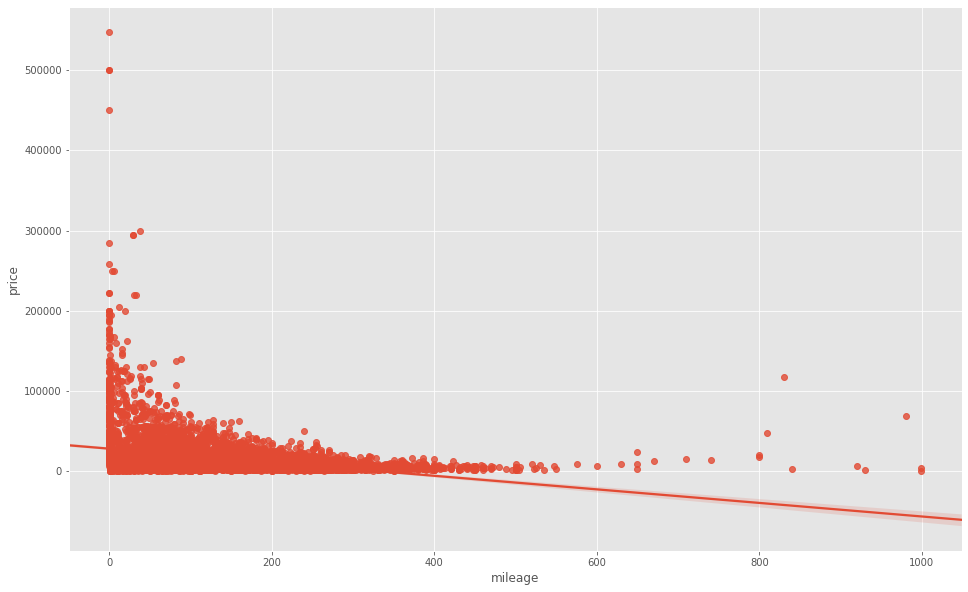

In [15]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
sns.regplot(x='mileage',y='price',data=car_df)

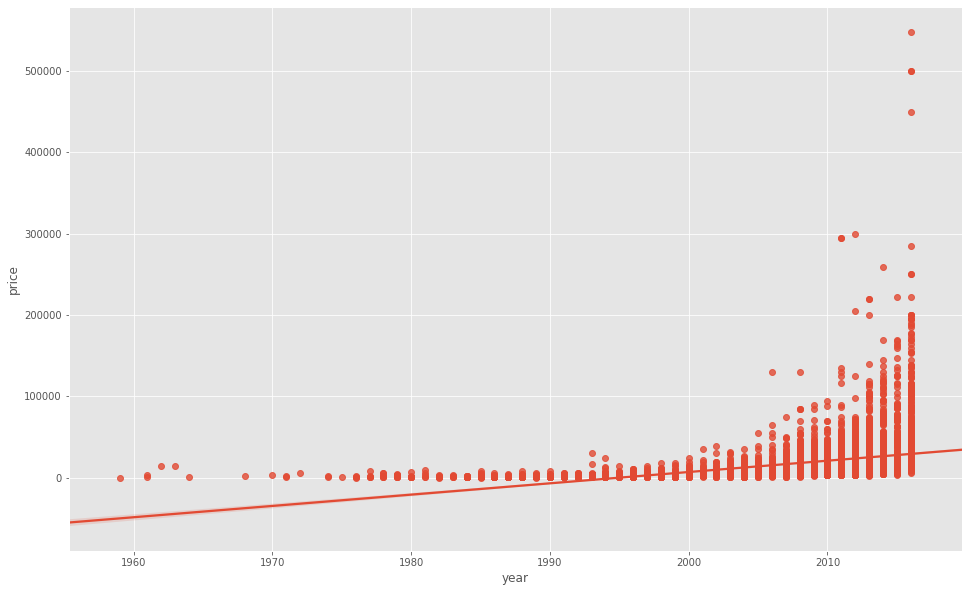

In [16]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
sns.regplot(x='year',y='price',data=car_df)

In [17]:
car_df.engV.unique()

array([ 2.5 ,  1.8 ,  5.5 ,  2.  ,  1.5 ,  2.2 ,  1.2 ,  4.8 ,  5.  ,
        3.  ,  4.4 ,  1.6 ,  2.98,  2.4 ,  2.8 ,  3.5 ,  2.99,  1.9 ,
        1.7 ,  4.5 ,  3.6 ,  1.4 ,  2.7 ,  4.  ,  3.8 ,  5.7 , 99.99,
        3.2 ,  3.7 ,  4.7 ,  1.  ,  4.6 ,  0.11,  4.2 ,  0.8 ,  2.3 ,
        1.3 ,  6.  ,  2.6 ,  0.6 ,  1.25,  5.46,  6.3 ,  5.6 ,  8.3 ,
        3.3 ,  1.1 ,  6.1 ,  0.65,  1.78,  2.1 ,  3.4 ,  7.  ,  5.2 ,
       75.  ,  6.5 ,  1.23,  8.  ,  6.2 ,  2.9 ,  1.34,  0.7 ,  1.39,
       90.  ,  5.3 ,  4.67, 20.  , 14.  , 11.5 ,  1.45,  9.  , 10.  ,
        4.66, 15.  ,  0.9 , 12.  ,  2.57,  1.91,  1.33,  2.49,  1.12,
        1.36,  2.14, 55.  ,  1.59, 28.  ,  8.7 ,  3.1 ,  2.15, 30.  ,
        4.3 ,  7.2 ,  5.4 , 66.  , 19.  ,  1.24, 18.  , 22.  , 70.  ,
        2.44,  6.75,  1.35,  2.17,  2.46,  2.28,  1.79,  0.14,  1.31,
        0.1 , 74.  ])

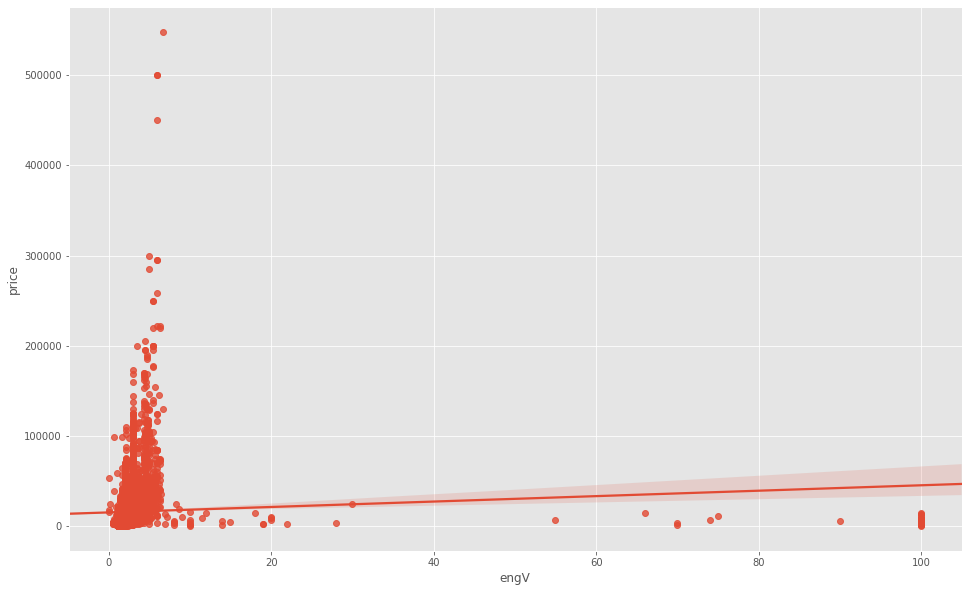

In [18]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
sns.regplot(x='engV',y='price',data=car_df)

Ini menununjukkan merek mobil yang paling terkenal dalam penjualan adalah Volkswagen dan Mercedes-Benz yang menjadi pilihan orang-orang berpenghasilan tinggi


In [19]:
car_df[car_df.price.isin(car_df.price.nlargest(10))].sort_values(['car','model','body','mileage','price'])

,car,price,body,mileage,engV,engType,registration,year,model,drive
4134,Bentley,449999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
1611,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
7914,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
1478,Bentley,259000.0,sedan,0,6.00,Petrol,yes,2014,Flying Spur,full
7621,Bentley,547800.0,sedan,0,6.75,Petrol,yes,2016,Mulsanne,rear
8205,Land Rover,285000.0,crossover,0,5.00,Petrol,yes,2016,Range Rover,full
5849,Mercedes-Benz,300000.0,other,37,5.00,Petrol,yes,2012,G 500,full
1891,Mercedes-Benz,295000.0,sedan,29,6.00,Petrol,yes,2011,S 600,rear
564,Mercedes-Benz,250000.0,other,6,5.50,Petrol,yes,2016,S 63 AMG,full
2165,Mercedes-Benz,295000.0,sedan,29,6.00,Petrol,yes,2011,S-Guard,rear


Ini menunjukkan 10 mobil dengan harga jual tertinggi berdasarkan detail modelnya dan tujuan penjualannya untuk dipasarkan kepada orang-orang berpenghasilan tinggi 


In [20]:
car_df[car_df.price.isin(car_df.price.nsmallest())].sort_values(['car','model','body','mileage','price'])

,car,price,body,mileage,engV,engType,registration,year,model,drive
5010,GAZ,259.35,sedan,1,2.4,Other,yes,1959,21,rear
7149,Moskvich-AZLK,400.00,sedan,1,10.0,Petrol,yes,1985,2140,rear
6457,Moskvich-AZLK,280.00,sedan,99,1.5,Petrol,yes,1976,2140,rear
8736,VAZ,400.00,sedan,10,1.1,Petrol,yes,1982,2101,rear
8252,ZAZ,370.50,sedan,3,1.1,Petrol,yes,1989,968,rear


Ini menunjukkan 5 mobil terlaris dengan harga terendah berdasarkan detail modelnya dan tujuan penjualannya untuk dipasarkan kepada masyarakat berpenghasilan rendah hingga menengah 


Ini menunjukkan merek mobil yang memiliki tipe body "sedan" yang memiliki  penjualan maksimum selama bertahun-tahun. Ini menunjukkan Orang lebih suka tipe body sedan oleh karenanya informasi ini dapat digunakan untuk mencapai penjualan maksimal dan untuk mengetahui produksi unit.


ini menunjukkan Tipe mesin yang paling disukai dan digunakan selama bertahun-tahun

In [21]:
car_df.drive.unique()

array(['full', 'rear', 'front'], dtype=object)

Text(0.5, 1.0, 'year - price lineplot (1950 - 2015)')

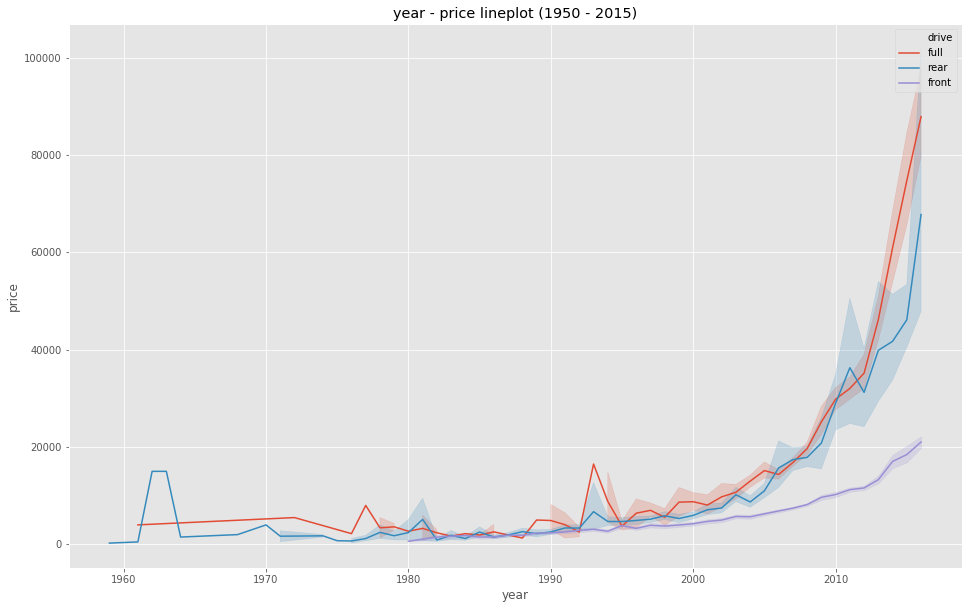

In [22]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
sns.lineplot(data=car_df, y='price', x='year', hue='drive')
plt.title("year - price lineplot (1950 - 2015)")

menunjukan tipe penggerak mobil 4W dari tahun ke tahun lebih diminati dan mobil bertipe 4WD ini memiliki harga yg semakin menigkat

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

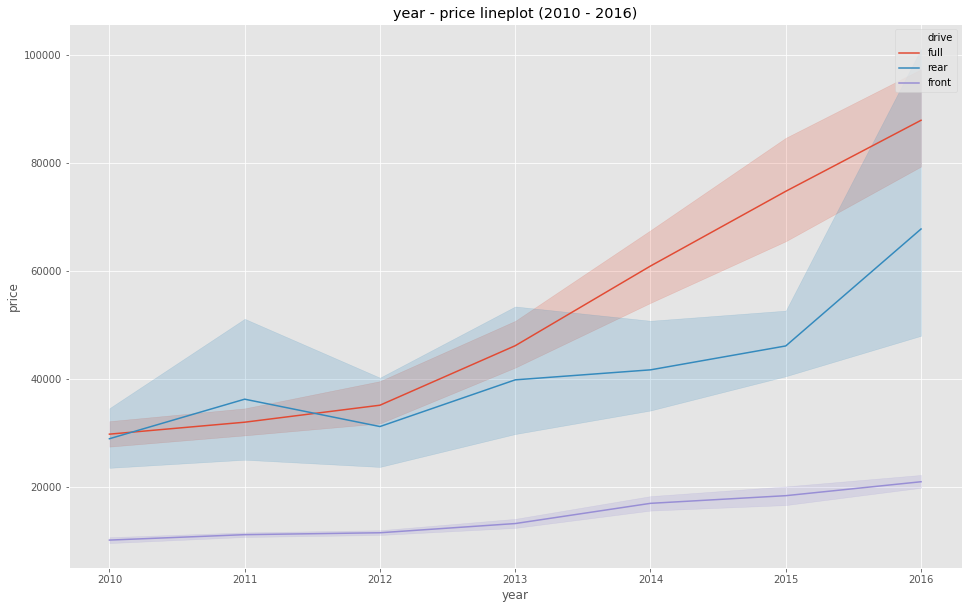

In [23]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
sns.lineplot(data=car_df[car_df.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")

Grafik di atas menunjukkan distribusi Harga selama bertahun-tahun (1953-2016). Seiring meningkatnya tahun, kami tidak dapat menganalisa kenaikan harga, tetapi secara umum, ada kenaikan harga dalam beberapa tahun terakhir.


In [24]:
car_df.engType.unique()

array(['Gas', 'Petrol', 'Diesel', 'Other'], dtype=object)

Text(0.5, 1.0, 'year - price line Plot')

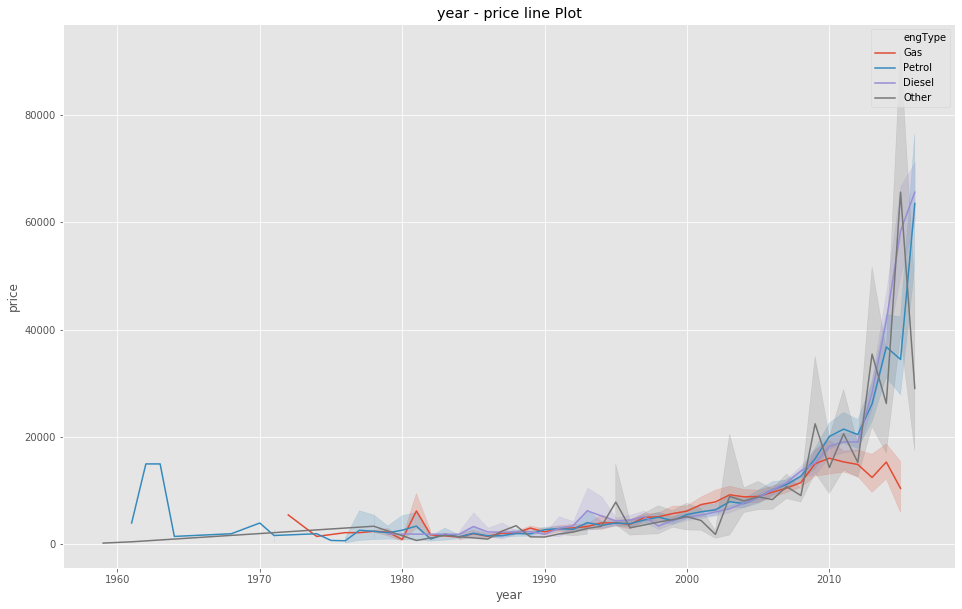

In [25]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
sns.lineplot(x='year',y='price',data=car_df, hue='engType')
plt.title("year - price line Plot")

Grafik di atas menunjukkan plot garis / hubungan antara jarak tempuh dan harga. Ini menunjukkan, harga berubah sesuai dengan nilai jarak tempuh. Jadi harga bervariasi berdasarkan jarak tempuh juga dan ini harus dipertimbangkan sebagai faktor untuk perhitungan.

Grafik multivarian di atas menunjukkan distribusi Harga selama bertahun-tahun dengan jenisnya. Dengan meningkatnya tahun, ini menunjukkan ada peningkatan yang signifikan dalam harga model mobil yang memiliki mesin tyep = "Bensin" dibandingkan dengan "Gas" dan "Diesel".


Pairplot ini memberikan pengamatan yang telah dirujuk dari grafik lain di atas, yaitu:

- Harga bervariasi berdasarkan Tahun dan Jarak Tempuh

- Seiring Tahun meningkat ada kenaikan harga kendaraan jenis mesin Bensin yang juga tergantung pada jarak tempuh juga.


Text(0.5, 1.0, 'year - price line Plot')

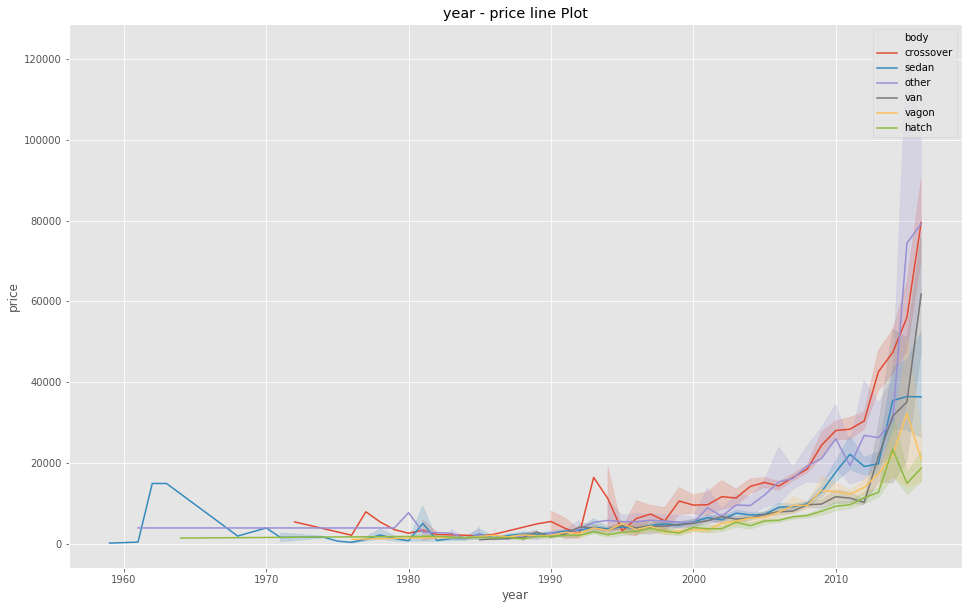

In [26]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
sns.lineplot(x='year',y='price',data=car_df, hue='body')
plt.title("year - price line Plot")

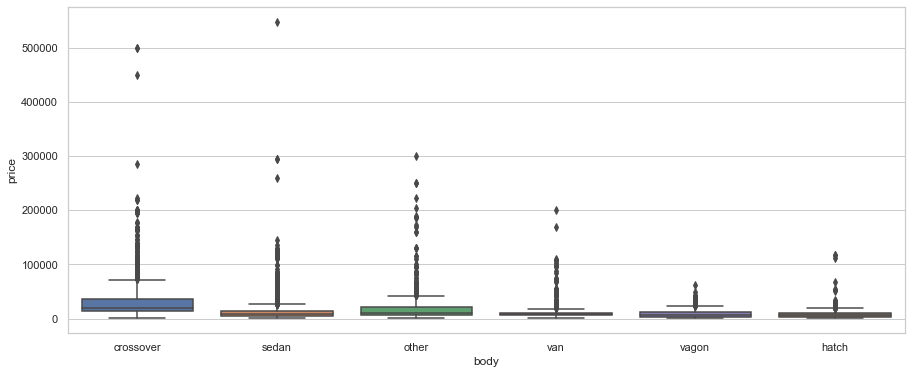

In [27]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
sns.boxplot(x='body', y='price', data=car_df)

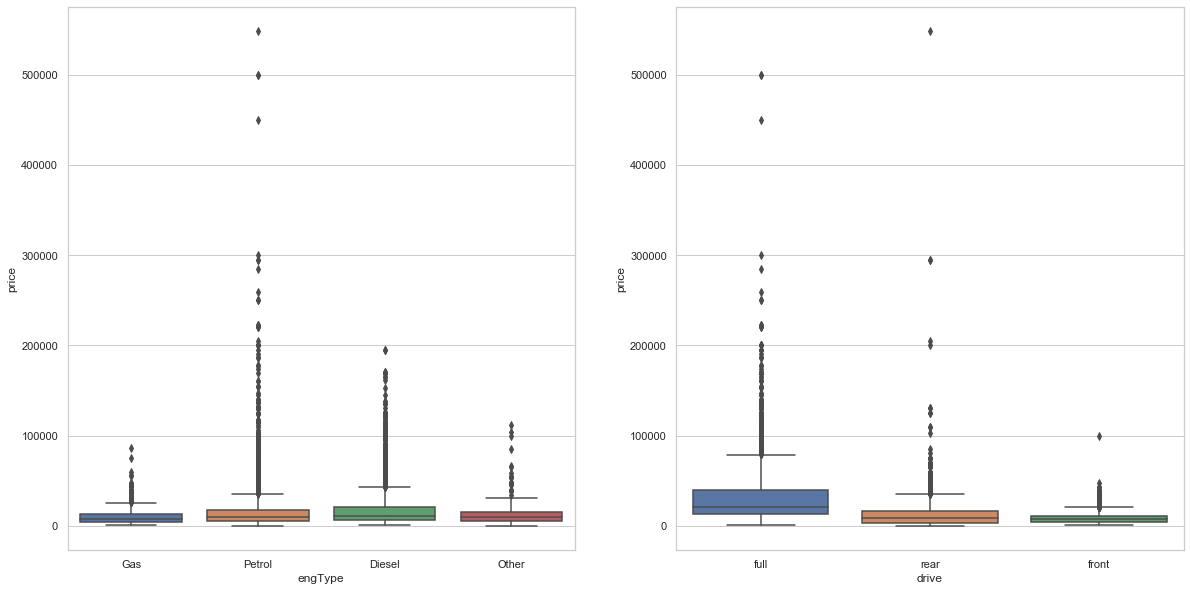

In [28]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(x='engType', y='price', data=car_df, ax=axis[0]);
sns.boxplot(x='drive', y='price', data=car_df, ax=axis[1])

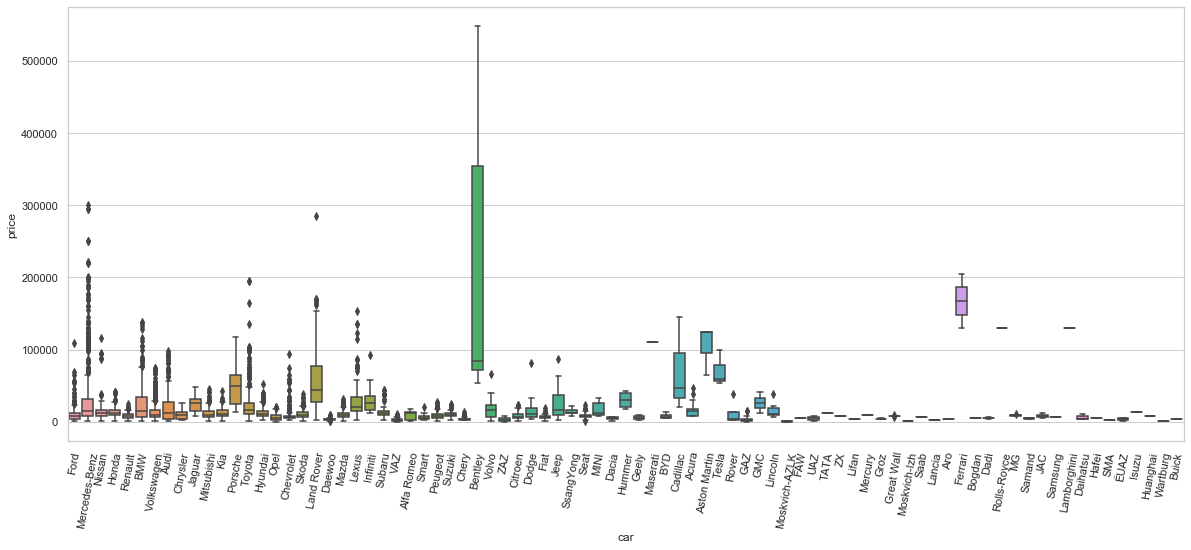

In [29]:
fig, axis = plt.subplots(figsize=(20, 8), )
sns.boxplot(x='car', y='price', data=car_df);
axis.set_xticklabels(car_df['car'].unique(), rotation=80);

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
car_df['car'] = labelencoder_X.fit_transform(car_df['car'])
car_df['body'] = labelencoder_X.fit_transform(car_df['body'])
car_df['engType'] = labelencoder_X.fit_transform(car_df['engType'])
car_df['registration'] = labelencoder_X.fit_transform(car_df['registration'])
car_df['model'] = labelencoder_X.fit_transform(car_df['model'])
car_df['drive'] = labelencoder_X.fit_transform(car_df['drive'])
car_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,23,15500.0,0,68,2.5,1,1,2010,469,1
1,50,20500.0,3,173,1.8,1,1,2011,318,2
2,50,35000.0,2,135,5.5,3,1,2008,228,2
3,50,17800.0,5,162,1.8,0,1,2012,196,0
5,55,16600.0,0,83,2.0,3,1,2013,813,1


In [31]:
y_train = car_df["price"]
x_train = car_df.drop(["price"], axis=1)

In [32]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(x_train, y_train, test_size = 0.3)

In [33]:
x_train.head(3)

,car,body,mileage,engV,engType,registration,year,model,drive
0,23,0,68,2.5,1,1,2010,469,1
1,50,3,173,1.8,1,1,2011,318,2
2,50,2,135,5.5,3,1,2008,228,2


In [34]:
import xgboost as xgb

In [35]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [36]:
car_df.price.skew()

7.209566792089813

In [37]:
#with log transform
label_test_log=np.log(label_test)

In [38]:
label_train_log=np.log(label_train)

In [39]:
dtrain_log = xgb.DMatrix(data_train, label_train_log)

In [40]:
label_train1=np.log(label_train)

In [41]:
label_train_log.skew()

0.1940575088641049

In [42]:
dtrain = xgb.DMatrix(data_train, label_train)

In [43]:
#without log transform
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)

[0]	train-rmse:28250.17188	test-rmse:28302.25065
[50]	train-rmse:8163.79362	test-rmse:11167.71745
[100]	train-rmse:5297.62695	test-rmse:10576.97363
[150]	train-rmse:4360.47510	test-rmse:10520.57064


In [44]:
#with log transform
cv_output_log = xgb.cv(xgb_params, dtrain_log, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)

[0]	train-rmse:8.30392	test-rmse:8.30393
[50]	train-rmse:0.72050	test-rmse:0.72920
[100]	train-rmse:0.25236	test-rmse:0.29090
[150]	train-rmse:0.22256	test-rmse:0.27329
[200]	train-rmse:0.20693	test-rmse:0.26638
[250]	train-rmse:0.19401	test-rmse:0.26196
[300]	train-rmse:0.18266	test-rmse:0.25798
[350]	train-rmse:0.17271	test-rmse:0.25551
[400]	train-rmse:0.16421	test-rmse:0.25376
[450]	train-rmse:0.15698	test-rmse:0.25207
[500]	train-rmse:0.15004	test-rmse:0.25120
[550]	train-rmse:0.14417	test-rmse:0.25044
[600]	train-rmse:0.13895	test-rmse:0.24967
[650]	train-rmse:0.13403	test-rmse:0.24938
[700]	train-rmse:0.12942	test-rmse:0.24876


In [45]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= 

num_boost_rounds)

[20:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [46]:
#with log transform
num_boost_rounds = len(cv_output)
model_log = xgb.train(dict(xgb_params, silent=0), dtrain_log, num_boost_round= 

num_boost_rounds)

[20:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




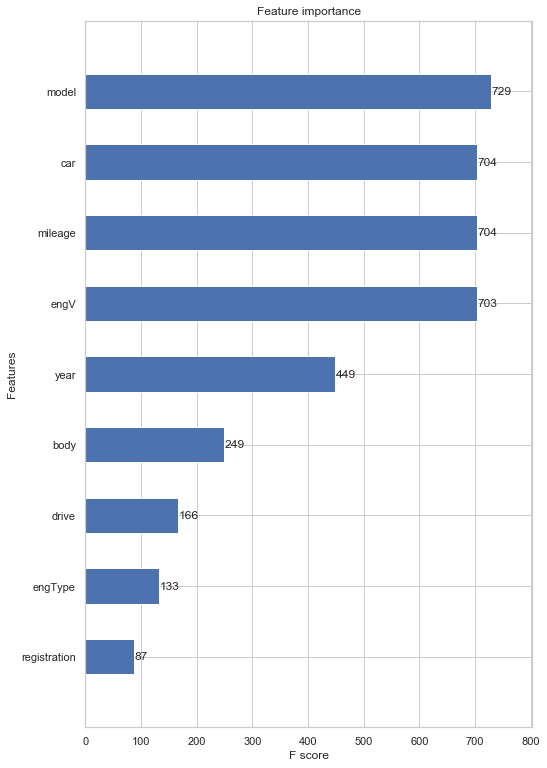

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [48]:
#without log transformation
dtest=xgb.DMatrix(data_test)

In [49]:
data_test.head(2)

,car,body,mileage,engV,engType,registration,year,model,drive
6738,58,2,11,3.8,3,1,2010,149,2
6381,56,4,95,1.4,3,1,2012,447,0


In [50]:
#without log
y_predict = model.predict(dtest)
out = pd.DataFrame({'Actual_price': label_test, 'predict_price': y_predict,'Diff' :(label_test-y_predict)})
out[['Actual_price','predict_price','Diff']].head(5)

,Actual_price,predict_price,Diff
6738,60000.0,71994.578125,-11994.578125
6381,14500.0,9750.250977,4749.749023
5912,11800.0,17276.451172,-5476.451172
4134,449999.0,476700.656250,-26701.656250
922,13900.0,12176.686523,1723.313477


In [51]:
#with log transformation
y_predict_log = model_log.predict(dtest)
y_predict_log=np.exp(y_predict_log)
out_log = pd.DataFrame({'Actual_price': label_test, 'predict_price': y_predict_log,'Diff' :(label_test-y_predict_log)})
out_log[['Actual_price','predict_price','Diff']].head(5)

,Actual_price,predict_price,Diff
6738,60000.0,57593.140625,2406.859375
6381,14500.0,9813.207031,4686.792969
5912,11800.0,15935.974609,-4135.974609
4134,449999.0,317785.000000,132214.000000
922,13900.0,12854.039062,1045.960938


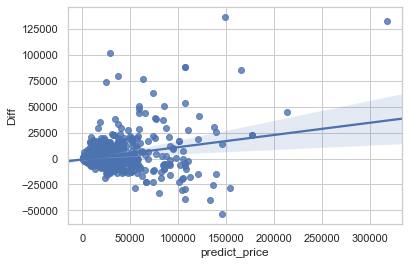

In [52]:
#log transformation
sns.regplot(out_log['predict_price'],out_log['Diff'])

In [53]:
out[['Actual_price','predict_price','Diff']].head(10)

,Actual_price,predict_price,Diff
6738,60000.0,71994.578125,-11994.578125
6381,14500.0,9750.250977,4749.749023
5912,11800.0,17276.451172,-5476.451172
4134,449999.0,476700.656250,-26701.656250
922,13900.0,12176.686523,1723.313477
8278,1999.0,3615.821533,-1616.821533
1049,5555.0,8760.103516,-3205.103516
4360,13500.0,10775.314453,2724.685547
3806,4999.0,4607.744141,391.255859
7183,5700.0,5163.667480,536.332520


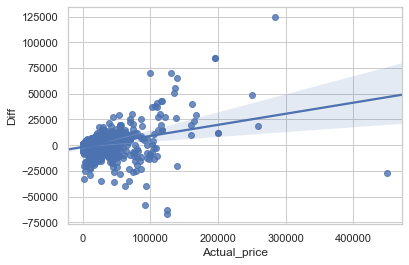

In [54]:
sns.regplot(out['Actual_price'],out['Diff'])

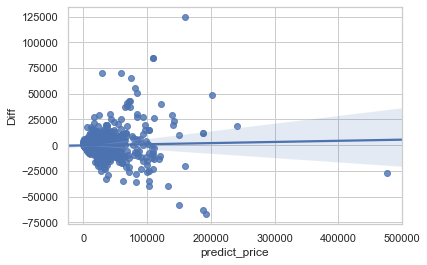

In [55]:
sns.regplot(out['predict_price'],out['Diff'])

Kesimpulan:
    - Dengan bantuan notebook saya belajar bagaimana analisis data eksplorasi dapat dilakukan dengan menggunakan plot Pandas.
    - Saya juga telah melihat penggunaan paket-paket seperti matplotlib dan seaborn untuk mengembangkan wawasan yang lebih baik tentang data.
    - Saya juga telah melihat bagaimana preprocees membantu dalam menangani nilai-nilai yang hilang dan irregualitas hadir dalam data. Saya juga belajar cara membuat fitur-fitur baru yang pada gilirannya akan membantu kami untuk lebih memprediksi kelangsungan hidup.
    - Saya juga memanfaatkan fitur profil panda untuk menghasilkan laporan html yang berisi semua informasi dari berbagai fitur yang ada dalam dataset.
    - Saya telah melihat dampak kolom seperti jarak tempuh, tahun, dan engType pada kenaikan / penurunan harga.
    - Kesimpulan paling penting yang diambil dari semua analisis ini adalah, saya mengenal fitur apa saja yang harga sangat berkorelasi positif dan negatif.
    - Analisis ini akan membantu saya memilih model pembelajaran mesin mana yang dapat kita terapkan untuk memprediksi harga set data uji dalam istilah dan proyek selanjutnya.
